## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [13]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 757.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
dataset = pd.read_csv('titanic.csv')

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [9]:
survival_rates = dataset.groupby('Sex')['Survived'].mean() * 100
print(survival_rates)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Задача 2:** Відтворіть ці графіки  
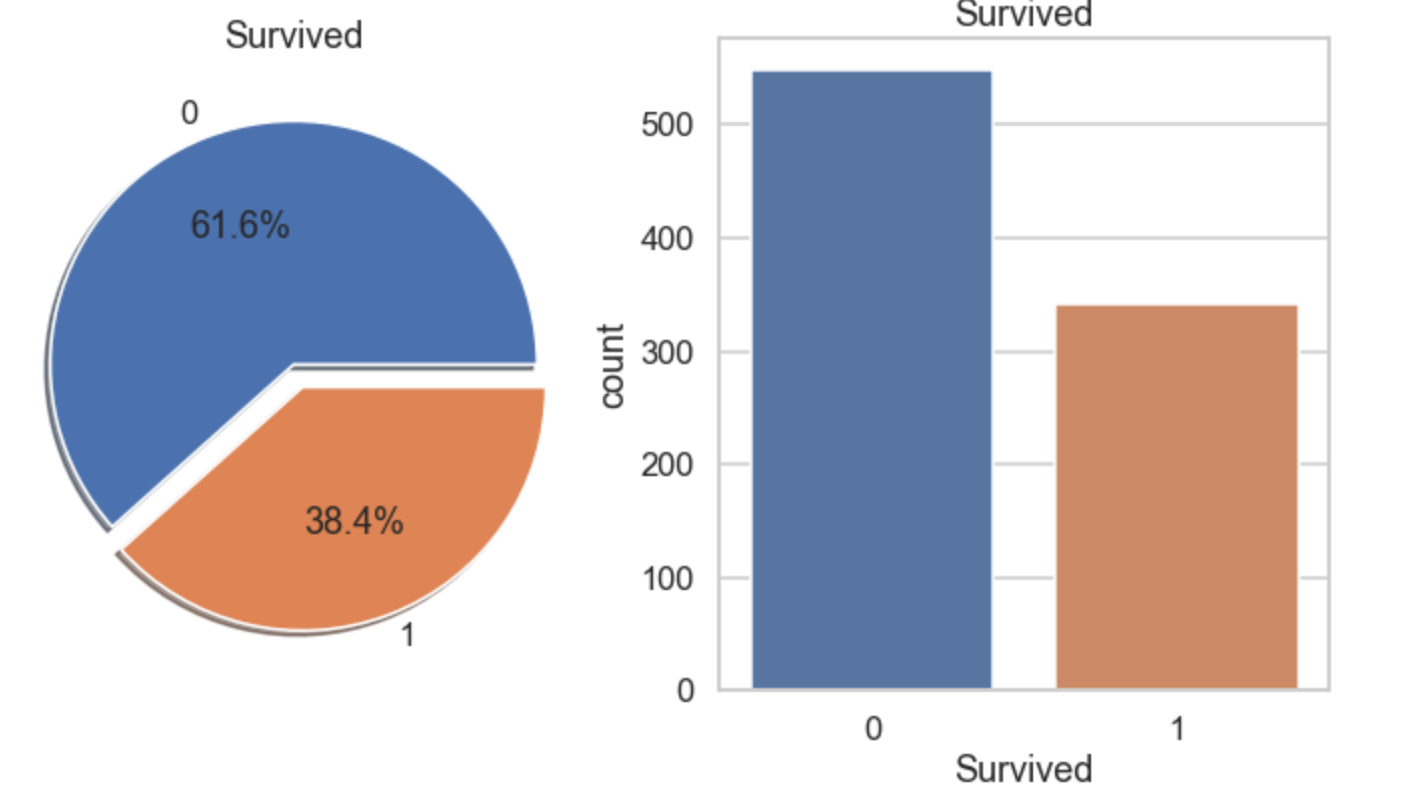


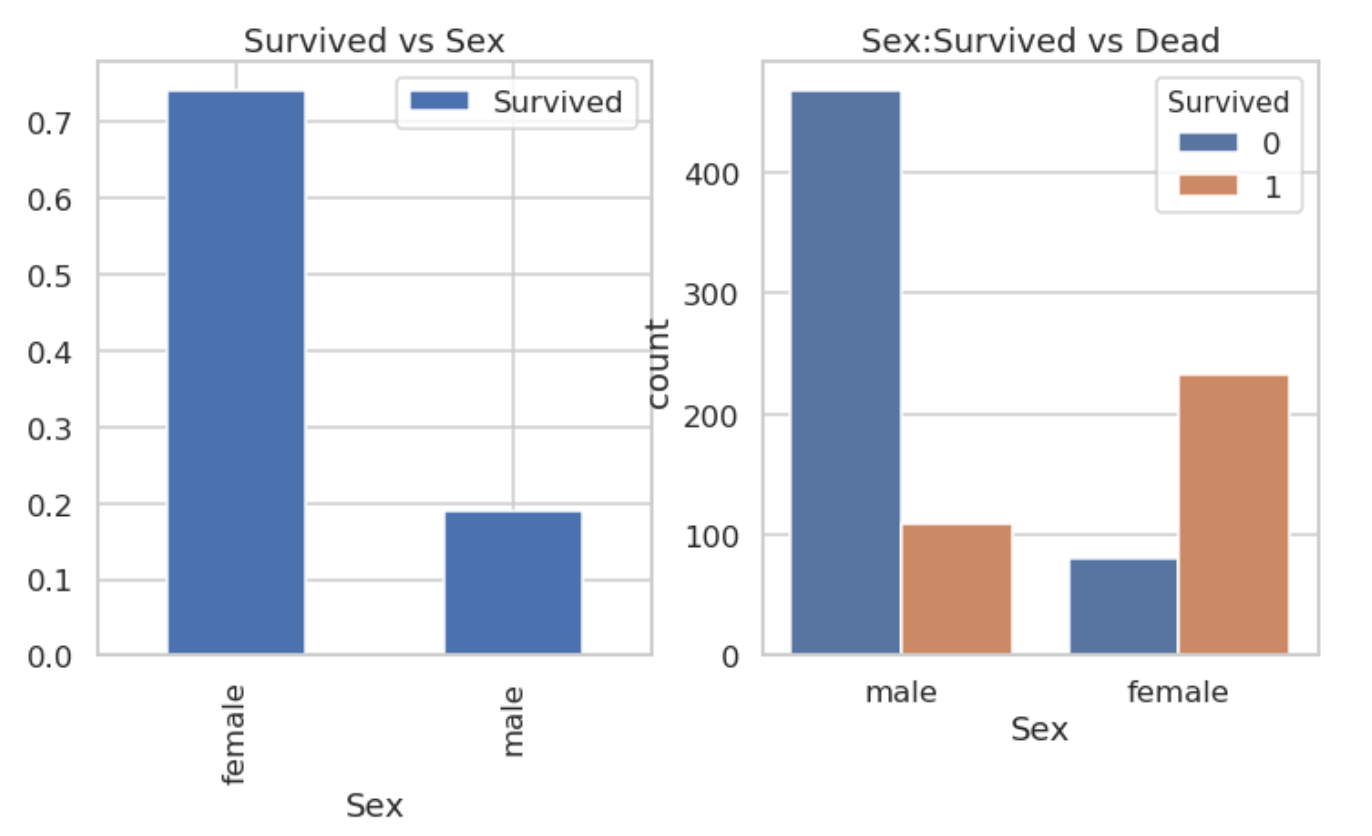

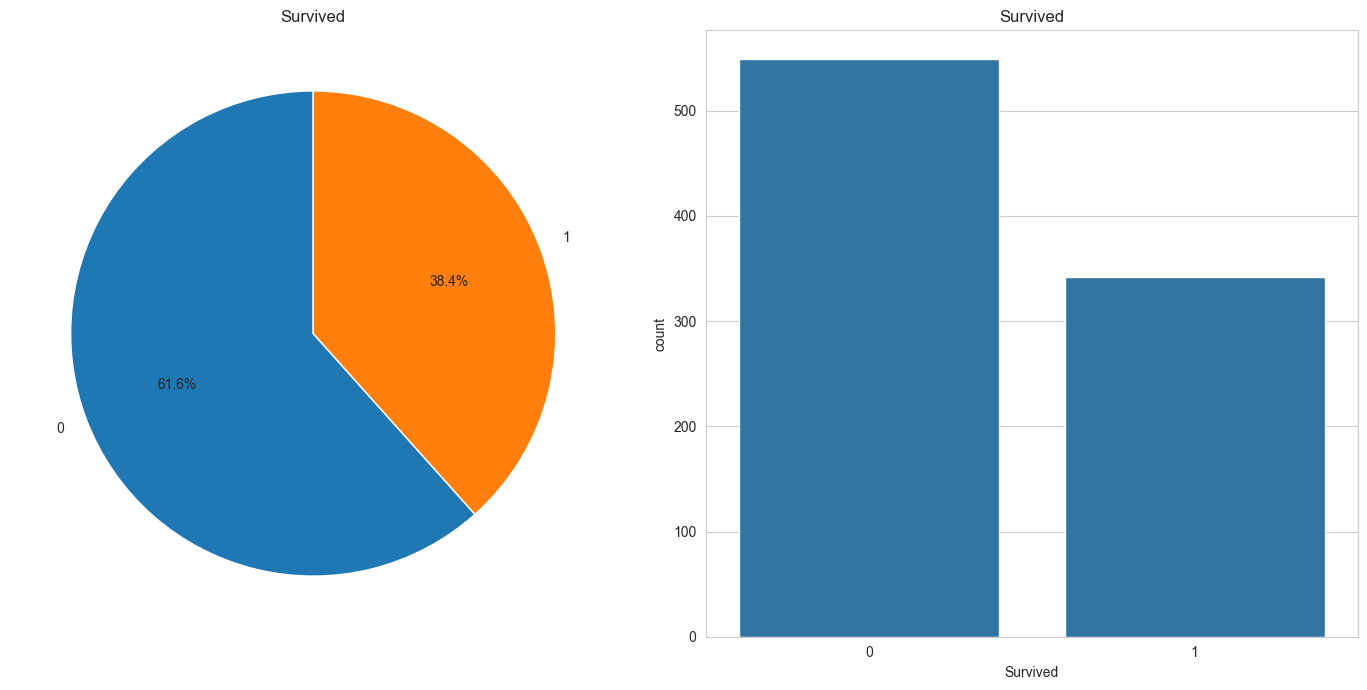

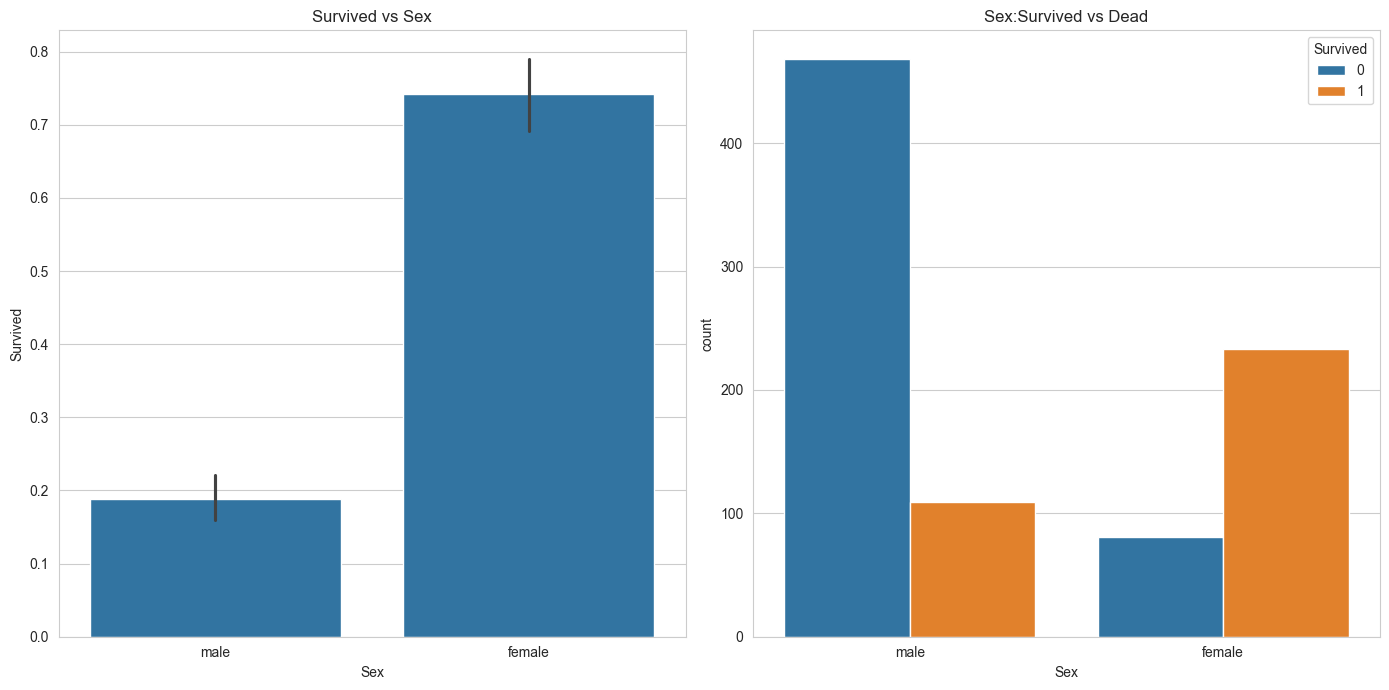

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
dataset['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('Survived')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=dataset)
plt.title('Survived')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Survived', data=dataset)
plt.title('Survived vs Sex')

plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=dataset)
plt.title('Sex:Survived vs Dead')

plt.tight_layout()
plt.show()

Прокоментуйте побудовані графіки

Кругова діаграма, яка показує відсоткове співвідношення виживших (38.4%) та невиживших (61.6%) пасажирів. Ця діаграма надає швидкий візуальний огляд співвідношення між двома групами.

Стовпчаста діаграма з кількістю виживших та невиживших. Така візуалізація корисна для відображення абсолютних чисел і забезпечує конкретні кількості для кожної категорії.

Стовпчаста діаграма, що показує відсоток виживших серед чоловіків та жінок. Видно, що відсоток виживання серед жінок значно вищий, ніж серед чоловіків, що може свідчити про соціальні норми чи правила евакуації "жінки та діти спочатку".

Стовпчасту діаграму, на якій кольором відмічено кількість виживших і невиживших за статтю. Знову ж таки, можна побачити, що відсоток виживших жінок значно вищий.

Ці графіки дають нам зрозуміти, що стать мала значний вплив на шанси виживання під час катастрофи Titanic.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [16]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [17]:
def extract_first_name_advanced(full_name):
    if '(' in full_name:
        name_part = full_name.split('(')[1].split(')')[0]
    else:
        name_part = full_name.split(", ")[1].split('.')[1]
    names = name_part.strip().split(' ')
    return names[0] if names else ''

female_first_names_advanced = dataset[dataset['Sex'] == 'female']['Name'].apply(extract_first_name_advanced)

most_common_female_name_advanced = female_first_names_advanced.mode()[0]
most_common_female_name_advanced, female_first_names_advanced.value_counts()

('Anna',
 Name
 Anna         15
 Mary         14
 Elizabeth    11
 Margaret     10
 Alice         6
              ..
 Gladys        1
 Gertrude      1
 Hanne         1
 Helena        1
 Gerda         1
 Name: count, Length: 178, dtype: int64)

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [18]:
def extract_first_name_advanced(full_name):
    if '(' in full_name:
        name_part = full_name.split('(')[1].split(')')[0]
    else:
        name_part = full_name.split(", ")[1].split('.')[1]
    names = name_part.strip().split(' ')
    return names[0] if names else ''

male_first_names_advanced = dataset[dataset['Sex'] == 'male']['Name'].apply(extract_first_name_advanced)

most_common_male_name_advanced = male_first_names_advanced.mode()[0]
most_common_male_name_advanced, male_first_names_advanced.value_counts()

('William',
 Name
 William       35
 John          23
 George        13
 Thomas        13
 Charles       12
               ..
 Wazli          1
 Wilhelm        1
 Sebastiano     1
 Adola          1
 Juozas         1
 Name: count, Length: 291, dtype: int64)

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
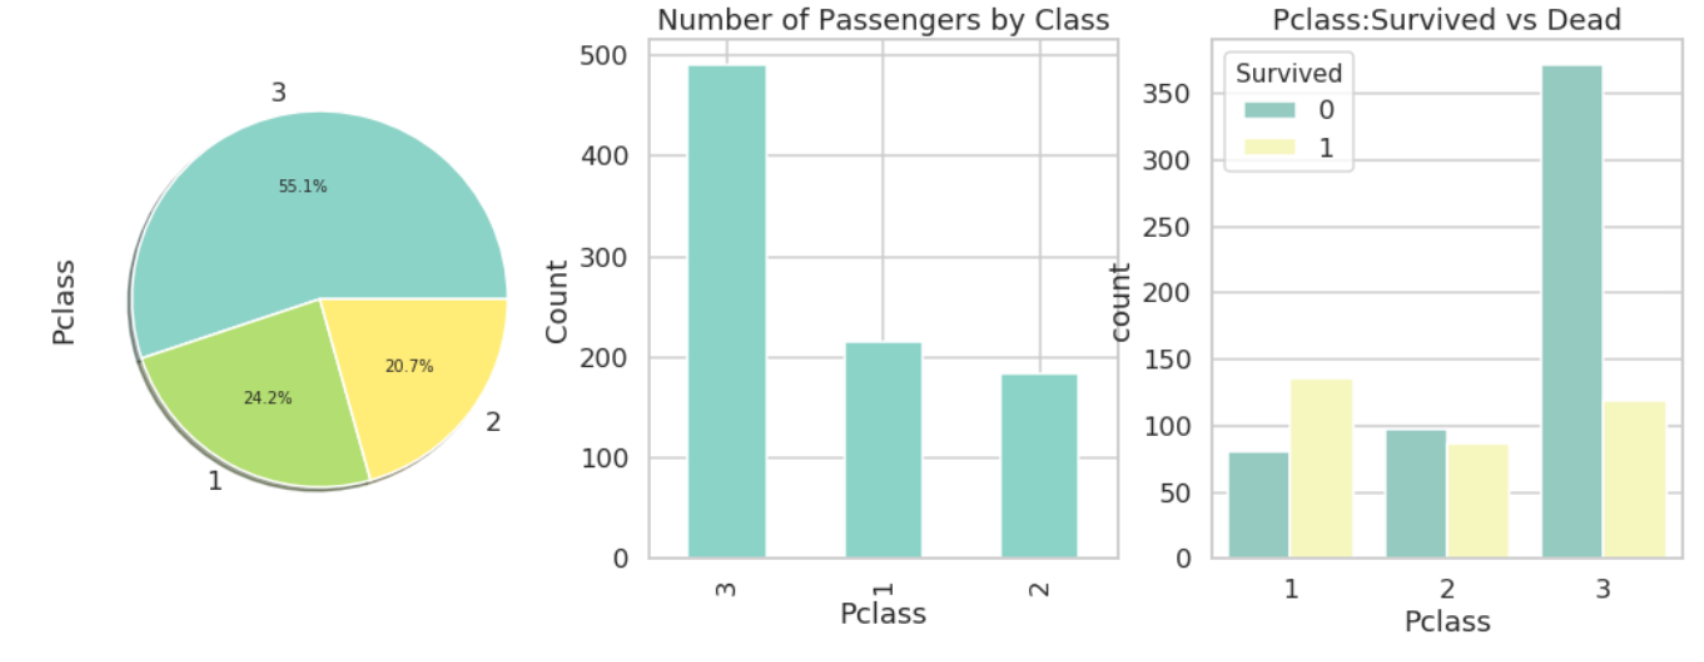

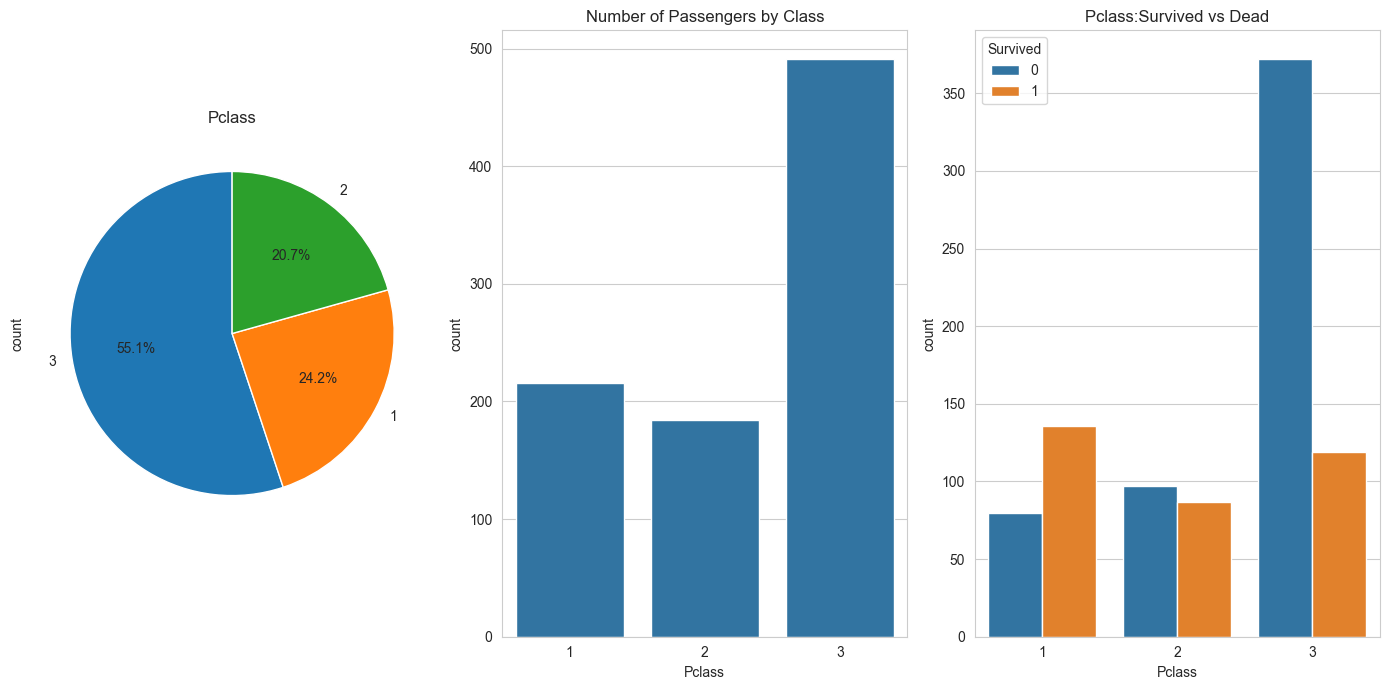

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
dataset['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Pclass')

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', data=dataset)
plt.title('Number of Passengers by Class')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Pclass:Survived vs Dead')

plt.tight_layout()
plt.show()

Прокоментуйте побудовані графіки

Кругова діаграма показує розподіл класів між пасажирами, та ми можемо побачити що 55% пасажирів було 3 класу

В стовпчастій діаграмі ми можемо побачити кількість пасажирів різних класів

В 3-тій стовпчастій діаграмі можемо побачити скільки пасажирів вижило і до якого класу вони відносились

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
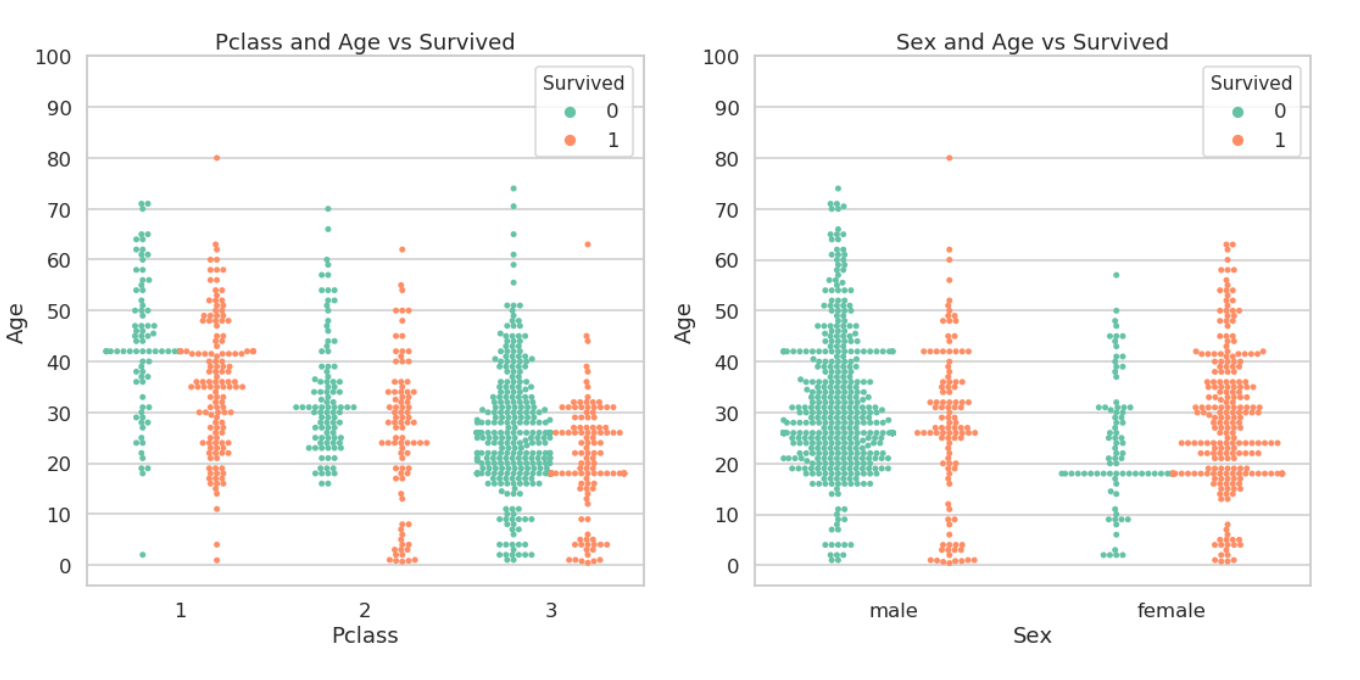![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

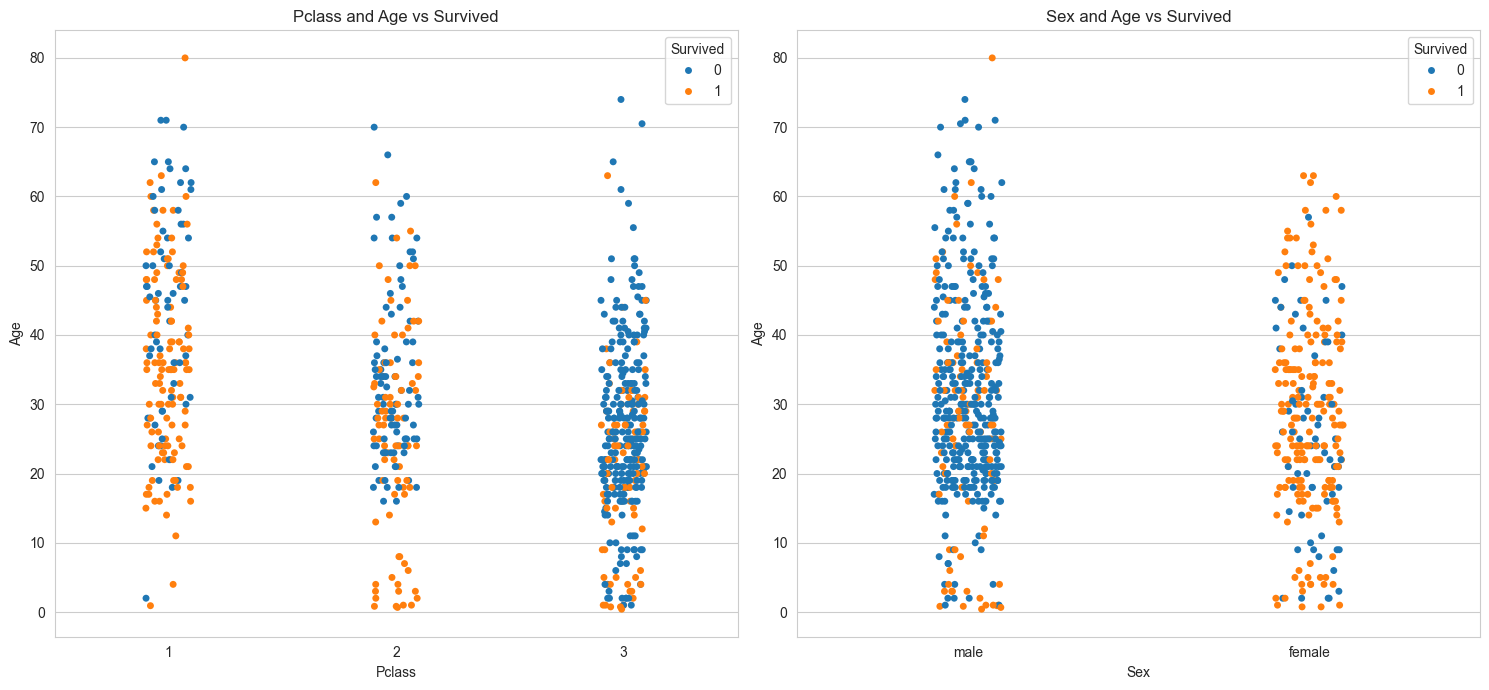

In [20]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.stripplot(x='Pclass', y='Age', hue='Survived', data=dataset, jitter=True)
plt.title('Pclass and Age vs Survived')

plt.subplot(1, 2, 2)
sns.stripplot(x='Sex', y='Age', hue='Survived', data=dataset, jitter=True)
plt.title('Sex and Age vs Survived')

plt.tight_layout()
plt.show()

Прокоментуйте побудовані графіки

На відтворених графіках відображені наступні відомості:

Перший графік (зліва) - це розкид точок, який демонструє взаємозв'язок між класом квитка (Pclass), віком пасажирів (Age) та їх виживанням (Survived). Кожнаточка відповідає одному пасажиру. Кольором розрізняють виживших (1) та невиживших (0). З цього графіка можна зробити висновок, що виживання пасажирів різних класів має різні характеристики, при цьому в першому класі виживання вище, а в третьому класі - нижче.

Другий графік (справа) - також розкид точок, який показує взаємозв'язок між статтю пасажира (Sex), віком (Age) та виживанням (Survived). Цей графік дозволяє визначити, що виживаність серед жінок вища в порівнянні з чоловіками незалежно від віку. Також можна помітити, що виживаність серед дітей і молодих людей вища, що може відображати успішність евакуаційних заходів для цих вікових груп.

**Задача 8** Побудуйте наступні діаграми розподілів:  

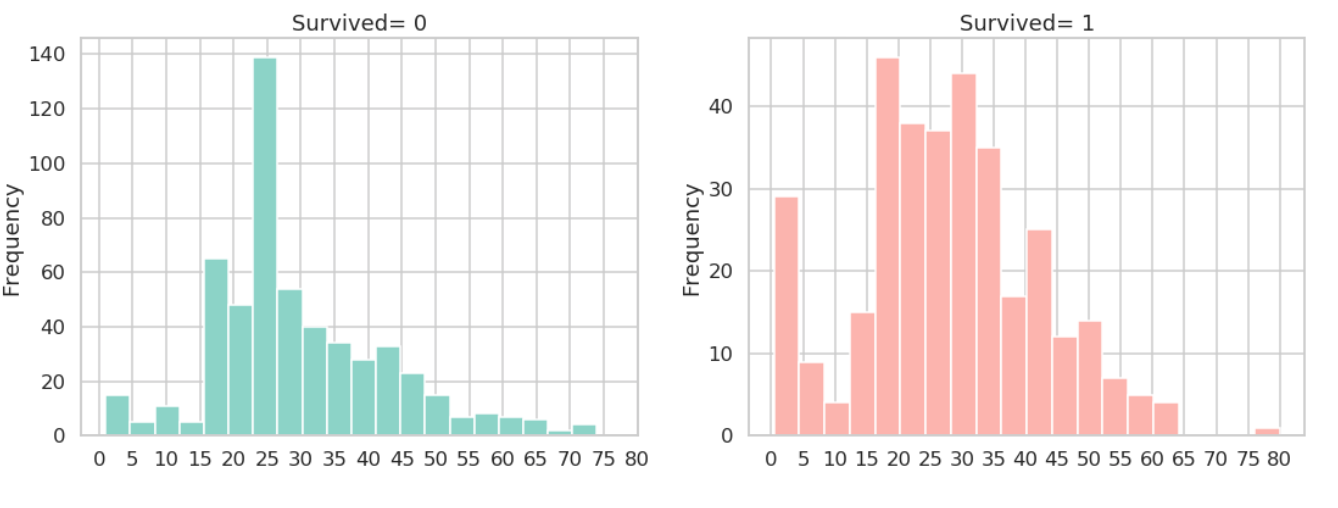



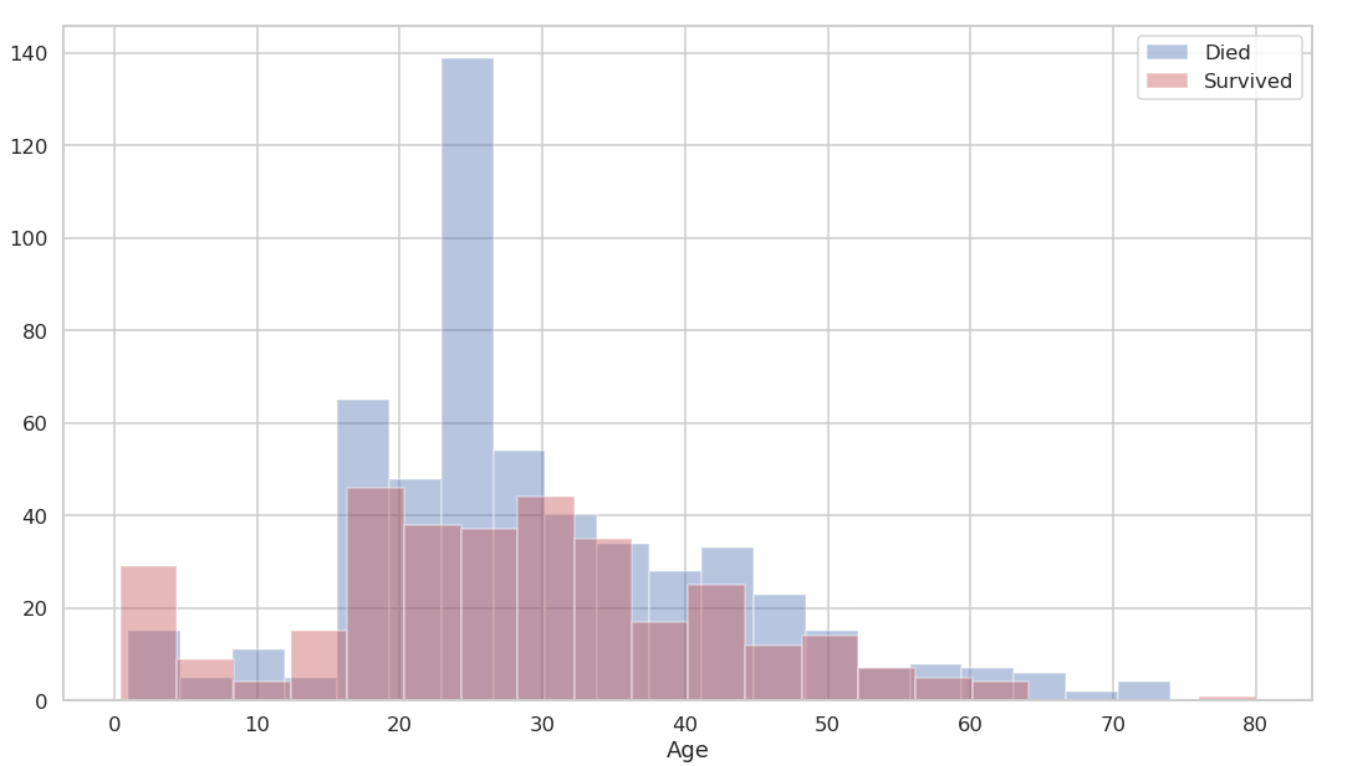

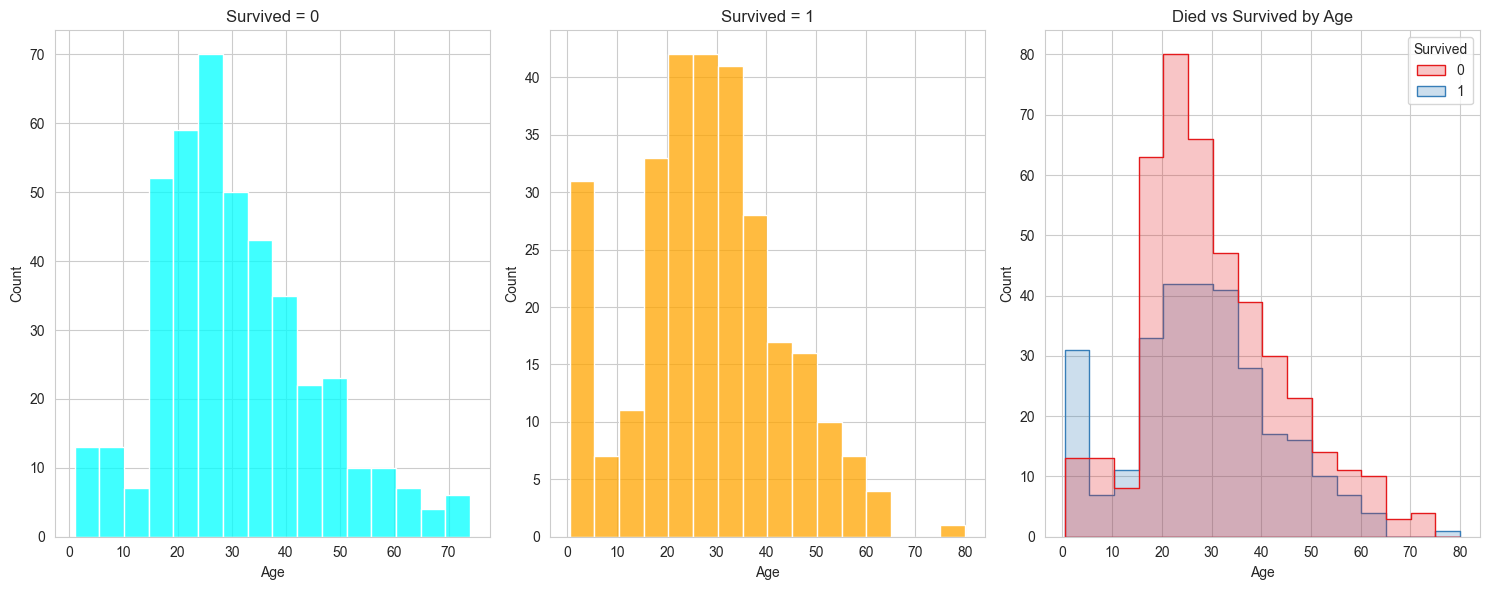

In [21]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(data=dataset[dataset['Survived'] == 0], x='Age', bins=16, color='cyan', kde=False)
plt.title('Survived = 0')

plt.subplot(1, 3, 2)
sns.histplot(data=dataset[dataset['Survived'] == 1], x='Age', bins=16, color='orange', kde=False)
plt.title('Survived = 1')

plt.subplot(1, 3, 3)
sns.histplot(data=dataset, x='Age', hue='Survived', element='step', bins=16, palette='Set1')
plt.title('Died vs Survived by Age')

plt.tight_layout()
plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


На графіках відображено гістограми розподілу віку пасажирів Titanic з розділенням на тих, хто вижив і тих, хто не вижив. З лівої гістограми видно, що більшість пасажирів, які не вижили, були віком від 15 до 30 років. Праворуч, гістограма показує, що виживших пасажирів також було багато в тій же віковій категорії, але співвідношення віживших більше в різних вікових групах.

Третя гістограма накладає обидва розподіли, дозволяючи візуально порівняти кількість виживших і невиживших в кожній віковій групі. Це дає змогу побачити, наприклад, що серед наймолодших (діти) і серед літніх людей виживаність була вищою, ніж серед молодих дорослих.

Ці гістограми надають корисну інформацію про розподіл віку серед виживших і невиживших, але для більш детальних статистичних оцінок і висновків потрібен додатковий аналіз. Зокрема, ці графіки не дають інформації про інші можливі впливові фактори на виживаність, такі як клас каюти, стать, наявність сім'ї на борту тощо. Для глибшого розуміння даних може знадобитися застосування статистичних тестів, моделювання та мультиваріативного аналізу.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
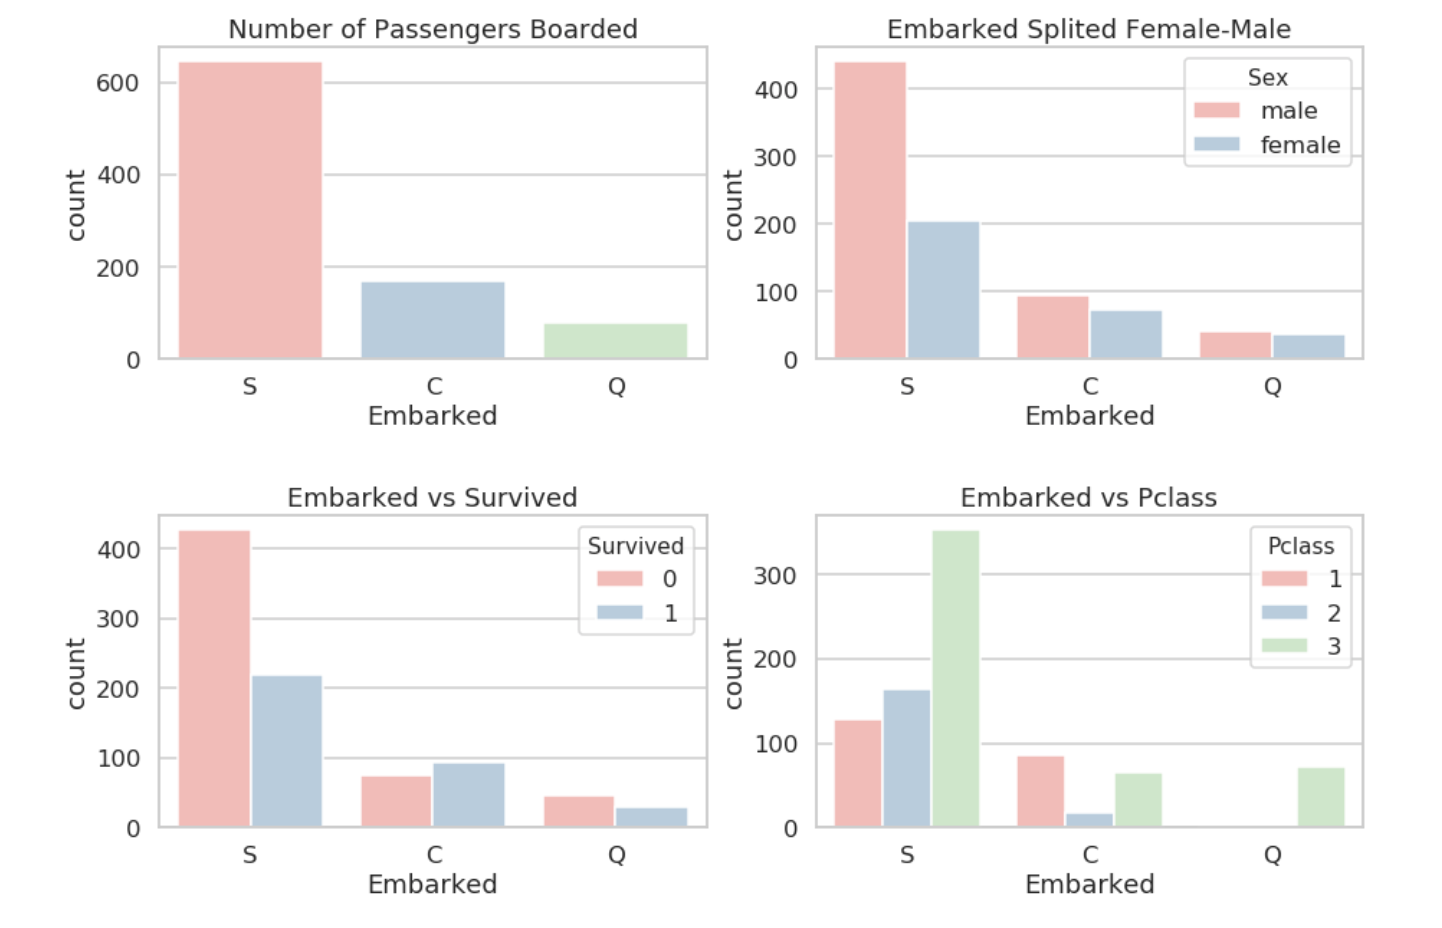

/var/folders/_q/3h3rxtss0n1fffxyjyrpv6q40000gn/T/ipykernel_65668/447273879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=dataset, palette='pastel')


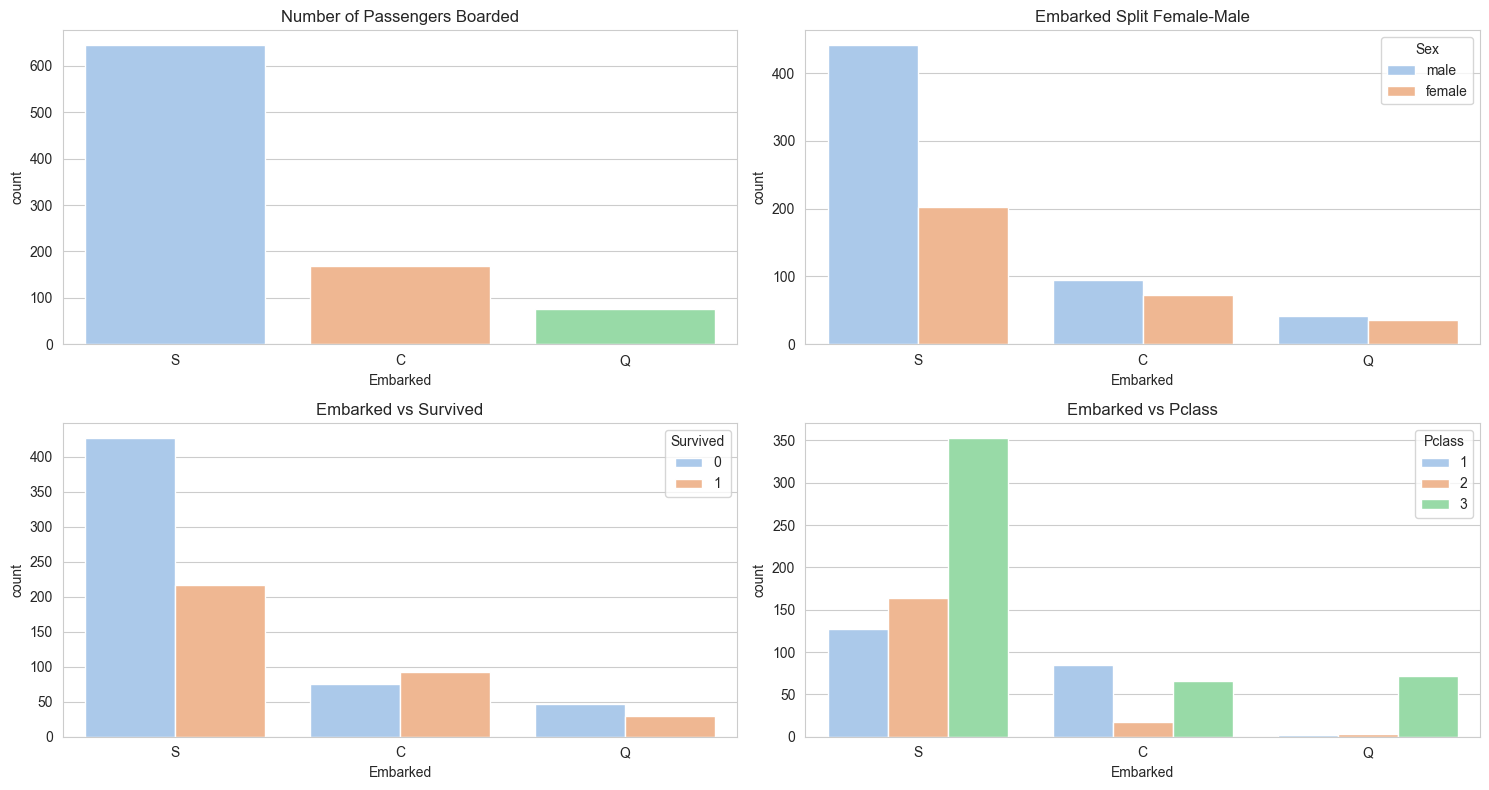

In [22]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Embarked', data=dataset, palette='pastel')
plt.title('Number of Passengers Boarded')

plt.subplot(2, 2, 2)
sns.countplot(x='Embarked', hue='Sex', data=dataset, palette='pastel')
plt.title('Embarked Split Female-Male')

plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=dataset, palette='pastel')
plt.title('Embarked vs Survived')

plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', hue='Pclass', data=dataset, palette='pastel')
plt.title('Embarked vs Pclass')

plt.tight_layout()
plt.show()

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

/var/folders/_q/3h3rxtss0n1fffxyjyrpv6q40000gn/T/ipykernel_65668/66020714.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=dataset, palette='pastel')


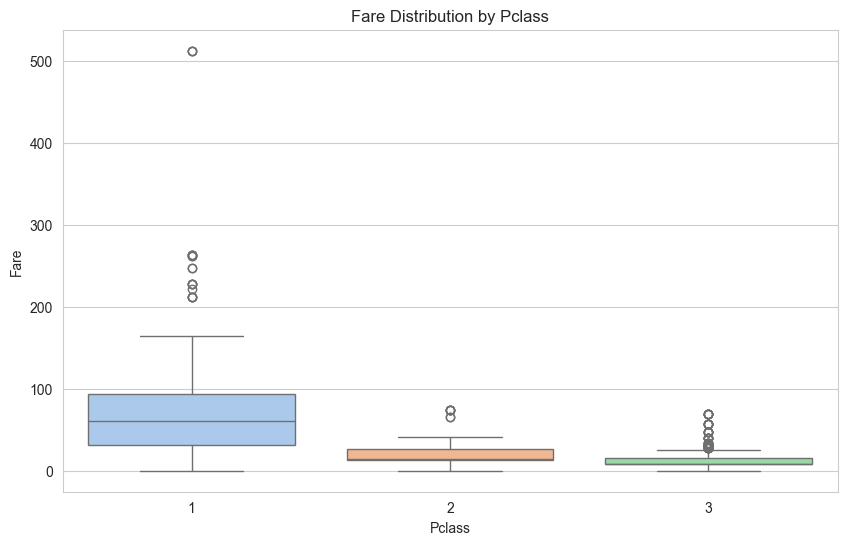

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset, palette='pastel')
plt.title('Fare Distribution by Pclass')
plt.show()

Прокоментуйте побудовані графіки

Ця діаграма є "ящиковою діаграмою", яка використовується для візуалізації розподілу цінових показників між різними класами пасажирів

Ця діаграма допомагає зрозуміти розподіл цін на квитки між різними класами пасажирів, а також ідентифікувати можливі викиди або неспівпадіння в цінових даних для кожного класу.





